In [1]:
import os
from kgcnn.data.moleculenet import MoleculeNetDataset

In [2]:
os.makedirs("ExampleMol", exist_ok=True)
csv_data = "smiles,Values1,Values2\nCCC, 1, 0.1\nCCCO, 2, 0.3\nCCCN, 3, 0.2\nCCCC=O, 4, 0.4\n"
with open("ExampleMol/data.csv", "w") as f:
    f.write(csv_data)

In [3]:
dts = MoleculeNetDataset()
dts.prepare_data(file_name="data.csv", data_directory="ExampleMol/", dataset_name="ExampleMol", overwrite=True,
                 smiles_column_name="smiles", make_conformers=True)

INFO:kgcnn: Generating molecules and store mol.json to disk...
 ... converted molecules 0 from 4
done


After ``prepare_data()`` is called, the cached mol-file can be read directly from the data-directory.

In [4]:
dts.read_in_memory(label_column_name="Values1", data_directory="ExampleMol/", dataset_name="ExampleMol", add_hydrogen=False)

INFO:kgcnn: Read mol-blocks from mol.json of pre-computed structures...
 ... read molecules 0 from 4
done


In [5]:
import networkx as nx
import rdkit.Chem as Chem

In [6]:
dts.node_number

[array([6, 6, 6]),
 array([6, 6, 6, 8]),
 array([6, 6, 6, 7]),
 array([6, 6, 6, 6, 8])]

In [7]:
dts.edge_indices

[array([[0, 1],
        [1, 0],
        [1, 2],
        [2, 1]], dtype=int64),
 array([[0, 1],
        [1, 0],
        [1, 2],
        [2, 1],
        [2, 3],
        [3, 2]], dtype=int64),
 array([[0, 1],
        [1, 0],
        [1, 2],
        [2, 1],
        [2, 3],
        [3, 2]], dtype=int64),
 array([[0, 1],
        [1, 0],
        [1, 2],
        [2, 1],
        [2, 3],
        [3, 2],
        [3, 4],
        [4, 3]], dtype=int64)]

In [8]:
G = nx.Graph()
G.add_nodes_from([(i, {"atom": x}) for i, x in enumerate(dts.node_symbol[3])])
G.add_edges_from(dts.edge_indices[3])

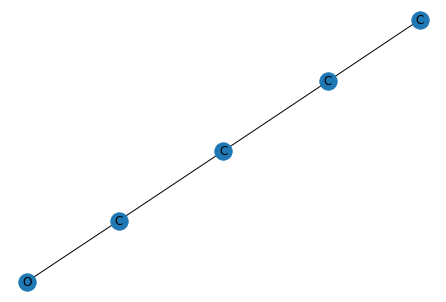

In [9]:
labels = nx.get_node_attributes(G, 'atom') 
nx.draw(G,labels=labels)

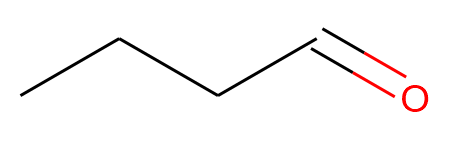

In [10]:
Chem.MolFromSmiles("CCCC=O")